In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import os
import re

from IPython.display import display, HTML
from warnings import simplefilter
simplefilter("ignore", category=UserWarning)


fig_num = 1
table_num = 1


def caption(text, subtext, fig=True):
    global fig_num
    global table_num
    if fig:
        cap = display(HTML(f'<br><span style="font-size:16px">\
                    <b>Figure   {fig_num}. {text}</b></span><br>{subtext}'))
        fig_num += 1
    else:
        cap = display(HTML(
            f'<br><span style="font-size:16px">\
            <b>Table   {table_num}. {text}</b></span><br>{subtext}'))
        table_num += 1
    return cap


def carry_gross_ret_map(fund_ccy, yld_ccy):
    num = np.log(df_rates_most[yld_ccy]*.01 + 1)
    denom = (df_rates_most[fund_ccy]*.01 + 1)
    return num / denom

<br>
<span style="font-family:monospace;color:teal;font-size:50px;font-weight:400">Our Currency, Your Problem 💸</span>
<div style="margin-top:5px"><span style="font-family:arial;color:gray;font-size:13.5px">ACS MSDS 2023 Term 2 | LT5 - Barot, Codia, Del Carmen, Jimenez, Lim, Militar</span></div>

<h1 style="color:teal;font-weight:500">Executive Summary</h1>

<div class="alert alert-block alert-success">
<strong>Our Currency, Your Problem:</strong> As our countrymen abroad lauded the continued rise of the Dollar against the Philippine Peso, citizens onshore are left wondering, what does it mean for prices in the country?
</div>

The study aims to analyze the factors surrounding the recent surge of the US Dollar using statistical methods, and how this rise affects the Philippine economy. But more importantly, we relate this recent development to the Philippine onshore setting. We address particularly how an increase in the foreign currency affects monetary policy and overall demand, especially for the average Filipino citizen. In this report, we've used different scraped datasets from Yahoo! Finance, International Monetary Fund (IMF), Bank for International Settlements, and the US Energy Information Administration. Two main analysis are conducted, including t-tests for the foreign exchange (FX) movement and Augmented Dickey Fuller Test (ADF) and Spearman Correlation Test for the energy shift and commodity indices analysis. Our analyses illustrate these insights:

1. Although the dollar index has visibly strengthened in absolute terms, using a two-sampled t-test, our analyses indicate that the means of log returns between the two time series (most recent period containing the dollar rise against the most previous period)  are <u>not</u> significantly different from each other. The USD reaching record levels <br>
<br>
2. Carry trade metrics have been tightening for the past few years for yield currencies against the dollar. With our sampled currencies, it is clearly visible that aggressive hikes by the Fed have tightened interest rate differentials. With carry yields that fall below expected risk premiums, fewer institutions use the dollar as a funding currency. We note this goes hand in hand with dollar strength.<br>
<br>
3. Fueled further by the pandemic, U.S. natural gas exports have continued to steadily increase, slowly shifting the nations as an importer to a net exporter. Pundits underscore the danger of this move, citing effects recently seen in the dynamic between the dollar and commodities markets: a deadly positive correlation between the two. Observing periods prior to and during the pandemic, we performed tests of stationarity (Augmented Dickey Fuller Test) and differencing to achieve a weakly stationary time series. Spearman's Rho was used as a metric of correlation and was tested, revealing a different result as expected. Prior periods do show a negative correlation between DXY and the Commodities Index, however it isn't the same for the pandemic period. The statistic does not vary significantly from zero, indicating no monotonic relationship between the two.


<h2 style="color:#008B8B;font-weight:400">Objectives</h2>

Our study aims to:
1. To explore the supposed strength of the US dollar, analyzing possible causes and if these are structural in nature; and
2. To understand FX movement in light of the Philippine economic setting.

<h2 style="color:#008B8B;font-weight:400">Limitations</h2>

The following are the limitations of the datasets used for the study:

* No derivative dynamics were involved
* Bid-ask spreads are omitted
* 2022 data ends as of October 1.
* Limitation of datasets to non-vendor provided data. Ideal frequencies may not have been utilized due to this limitation

<h1 style="color:teal;font-weight:500">Methodology</h1>

Our study aims to analyze the factors surrounding the recent USD strength and to understand the significance of these factors to corresponding observed market trends using relevant statistical methods. The datasets were gathered from various pertinent sources: exchange rate data were obtained from Yahoo!finance api, commodities prices based from the US Energy Information Administration and International Monetary Fund, and policy rates compiled by the Bank for International Settlements. Various statistical tests and analyses were utilized for all time-series data to uncover underlying relationships.

![](ACS_Final_Project_Methodology.png)

<h1 style="color:teal;font-weight:500">Data Collection</h1>

The list of datasets collected are available in the `files` directory as seen below. Previews of each table are also shown as they are used in the notebook.

In [2]:
print([i for i in os.listdir('files') if bool(re.search('.csv|.xls|.xlsx$', i))])

['usdjpy_08_to_22.csv', 'dxywhole_08_to_22.csv', 'dxy_08_to_22_d.csv', 'audusd_08_to_22.csv', 'usdcny_08_to_22.csv', 'dxy_08_to_22_m.csv', 'gbpusd_08_to_22.csv', 'natgas_imports.xls', 'natgas_exports.xls', 'IMF_commodities.xls', 'cbpol_2211.xlsx', 'eurusd_08_to_22.csv', 'usdcad_08_to_22.csv']



| File | Description | Collection |
| --- | --- | --- |
| dxy_08_to_22_d.csv | Daily USD Prices from 2008 to 2022 | yfinance |
| dxywhole_08_to_22.csv | Daily USD Prices from 1971 to 2022 (max) | yfinance |
| audusd_08_to_22.csv | FX Prices: AUD against USD from 2008 to 2022 | yfinance |
| eurusd_08_to_22.csv | FX Prices: EUR against USD from 2008 to 2022 | yfinance |
| gbpusd_08_to_22.csv | FX Prices: GBP against USD from 2008 to 2022 | yfinance |
| usdcad_08_to_22.csv | FX Prices: USD against CAD from 2008 to 2022 | yfinance |
| usdcny_08_to_22.csv | FX Prices: USD against CNY from 2008 to 2022 | yfinance |
| usdjpy_08_to_22.csv | FX Prices: USD against JPY from 2008 to 2022 | yfinance |
| natgas_imports.xls | Natural Gas Imports of the USA | downloaded from EIA |
| natgas_exports.xls | Natural Gas Exports of the USA | downloaded from EIA |
| IMF_commodities.xls | International Monetary Fund All Commodity Prices | downloaded from IMF |
| cbpol_2211.xlsx | Country Interest Rates in 2022 | downloaded from BIS |
| df_cuts, df_hikes | Fed Cuts and Hikes | scraped from Forbes |

The following tables are csv files comprised of market data extracted from Yahoo Finance API using an unofficial pythonic library, `yfinance`. Due to risk of being blacklisted for too many calls, the code for the scraping is provided below, but saved to csv files found in the `files` directory so as not be run again.

```python
import sys
!{sys.executable} -m pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

# You can get yourself rate limited/blacklisted.
# Again because the libraries and unofficial APIs sometimes scrape data, 
# they could get rate limited or blacklisted by Yahoo Finance at any time 
# (for making too many scrapes).

# ticker: case insensitive ticker of the desired stock/bond
# start_date: date you want the data to start from (mm/dd/yyyy)
# end_date: date you want the data to end (mm/dd/yyyy)
# index_as_date: {True, False}. Default is true. If true then the dates of the records are set as the index, else they are returned as a separate column.
# interval: {“1d”, “1wk”, “1mo”}. Refers to the interval to sample the data: “1d”= daily, “1wk”= weekly, “1mo”=monthly.

dxy = yf.Ticker("DX-Y.NYB")
df_dxy_m = dxy.history(start="2008-01-01", end="2022-10-01", interval="1mo")
df_dxy_d = dxy.history(start="2008-01-01", end="2022-10-01", interval="1d")
df_dxy_whole = dxy.history(period="max")
df_dxy_m.to_csv('dxy_08_to_22_m.csv')
df_dxy_d.to_csv('dxy_08_to_22_d.csv')
df_dxy_whole.to_csv('dxywhole_08_to_22.csv')

eurusd = yf.Ticker("EURUSD=X")
usdjpy = yf.Ticker("JPY=X")
gbpusd = yf.Ticker("GBPUSD=X")
audusd = yf.Ticker("AUDUSD=X")
usdcad = yf.Ticker("CAD=X")
usdcny = yf.Ticker("CNY=X")
df_eurusd = eurusd.history(
    start="2008-01-01", end="2022-10-01", interval="1mo")
df_usdjpy = usdjpy.history(
    start="2008-01-01", end="2022-10-01", interval="1mo")
df_gbpusd = gbpusd.history(
    start="2008-01-01", end="2022-10-01", interval="1mo")
df_audusd = audusd.history(
    start="2008-01-01", end="2022-10-01", interval="1mo")
df_usdcad = usdcad.history(
    start="2008-01-01", end="2022-10-01", interval="1mo")
df_usdcny = usdcny.history(
    start="2008-01-01", end="2022-10-01", interval="1mo")
df_eurusd.to_csv('eurusd_08_to_22.csv')
df_usdjpy.to_csv('usdjpy_08_to_22.csv')
df_gbpusd.to_csv('gbpusd_08_to_22.csv')
df_audusd.to_csv('audusd_08_to_22.csv')
df_usdcad.to_csv('usdcad_08_to_22.csv')
df_usdcny.to_csv('usdcny_08_to_22.csv')


```

In [3]:
df_dxy_d = pd.read_csv('files/dxy_08_to_22_d.csv', parse_dates=['Date'])
df_dxy_d['Date'] = pd.to_datetime(df_dxy_d['Date'], utc=True)
df_dxy_d.index = df_dxy_d.set_index('Date').index.to_period('D')

caption('Daily USD Prices (2008-2022)',
        'Prices of the US Dollar from January 2, 2008 to September 30, 2022',
        fig=False)
display(HTML(f'<center>{df_dxy_d.head().to_html()}</center>'))

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2008-01-02,2008-01-02 05:00:00+00:00,76.349998,76.650002,75.900002,75.970001,0,0,0
2008-01-03,2008-01-03 05:00:00+00:00,75.989998,76.160004,75.709999,75.889999,0,0,0
2008-01-04,2008-01-04 05:00:00+00:00,75.949997,76.080002,75.430000,75.790001,0,0,0
2008-01-07,2008-01-07 05:00:00+00:00,76.050003,76.339996,75.849998,76.169998,0,0,0
2008-01-08,2008-01-08 05:00:00+00:00,76.099998,76.250000,75.949997,76.110001,0,0,0


In [4]:
data_dir = 'files'
data_files = os.listdir(data_dir)
fx = [i for i in data_files if bool(re.search(r'^usd\w{3}_08_to_22.csv$', i))]
fx_rep = [i for i in data_files if bool(re.search(r'^\w{3}usd_08_to_22.csv$', i))]

df_fx = {}

for f in fx:
    temp_df = pd.read_csv(os.path.join(data_dir, f))
    temp_df['Date'] = pd.to_datetime(temp_df['Date'], utc=True)
    temp_df.index = temp_df.set_index('Date').index.to_period('M')
    temp_df = temp_df.drop(columns=['Date'])
    df_fx[f'df_{f[:6]}'] = temp_df

for f in fx_rep:
    temp_df = pd.read_csv(os.path.join(data_dir, f))
    temp_df['Date'] = pd.to_datetime(temp_df['Date'], utc=True)
    temp_df.index = temp_df.set_index('Date').index.to_period('M')
    temp_df = temp_df.drop(columns=['Date'])
    temp_df = 1/temp_df
    df_fx[f'df_{f[:6]}'] = temp_df

In [5]:
for df in df_fx:
    caption(f'FX Prices: {df[3:6].upper()} against {df[6:].upper()}',
            'from January 2, 2008 to September 30, 2022',
            fig=False)
    display(HTML(f'<center>{df_fx[df].head().to_html()}</center>'))

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-01,111.199997,111.968002,105.040001,106.250999,0,0,0
2008-02,106.300003,108.559998,103.620003,103.769997,0,0,0
2008-03,103.500000,107.739998,95.839996,99.849998,0,0,0
2008-03,101.660004,108.279999,100.080002,103.943001,0,0,0
2008-04,104.400002,108.410004,102.580002,105.430000,0,0,0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-01,7.2941,7.2941,7.1730,7.1730,0,0,0
2008-02,7.1730,7.1905,7.0940,7.1019,0,0,0
2008-03,7.0982,7.1030,7.0022,7.0024,0,0,0
2008-03,7.0170,7.0244,6.9732,6.9785,0,0,0
2008-04,6.9915,6.9990,6.9255,6.9325,0,0,0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-01,0.99810,1.0375,0.9844,1.0013,0,0,0
2008-02,1.00133,1.0195,0.9711,0.9870,0,0,0
2008-03,0.98600,1.0307,0.9756,1.0253,0,0,0
2008-03,1.02280,1.0272,0.9989,1.0080,0,0,0
2008-04,1.01800,1.0231,0.9807,0.9937,0,0,0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-01,1.1438,1.1088,1.1740,1.1168,inf,inf,inf
2008-02,1.1161,1.0527,1.1250,1.0756,inf,inf,inf
2008-03,1.0732,1.0559,1.1163,1.0943,inf,inf,inf
2008-03,1.1023,1.0484,1.1038,1.0596,inf,inf,inf
2008-04,1.0714,1.0359,1.0775,1.0465,inf,inf,inf


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-01,0.50365,0.50140,0.51303,0.50236,inf,inf,inf
2008-02,0.50239,0.50068,0.51632,0.50337,inf,inf,inf
2008-03,0.50325,0.49036,0.50695,0.50398,inf,inf,inf
2008-03,0.50556,0.49920,0.51010,0.50307,inf,inf,inf
2008-04,0.50538,0.50258,0.51597,0.50518,inf,inf,inf


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-01,0.68488,0.64132,0.69575,0.67272,inf,inf,inf
2008-02,0.67268,0.64222,0.69195,0.65824,inf,inf,inf
2008-03,0.65859,0.62881,13.71700,0.63460,inf,inf,inf
2008-03,0.64033,0.62449,0.64445,0.64012,inf,inf,inf
2008-04,0.64608,0.63219,0.65058,0.64276,inf,inf,inf


<h1 style="color:teal;font-weight:500">Initial Analysis FX Movement</h1>

<h2 style="color:#008B8B;font-weight:400">The US Dollar</h2>

When people speak of currencies, many commit the error of quoting currency value in itself. <i>"The dollar strengthened"</i> is a common error in statement. Currencies are measured with regard to its counterpart in a trade. The dollar strengthened against *what*? For eaxample, if you're a resident of Brazil, this statement is false. You could verify that Brazil, as an emerging market, has performed very well against the dollar in 2022. Against most developed countries, however, the dollar has been at a tear in 2022.

When Donald Trump was still at the highest seat of power, underlying the now infamous Trade War with China, was the silent war in the USDCNY / USDCNH pair. Many analysts around the globe touted the losing battle of the US, boldly predicting that the Yuan as the new premiere reserve and transactional currency. Now 6 years later, at a seeming post-pandemic phase, the dollar is as strong as ever. 

For this study, two primary factors will be examined with regard to the investigation into the dollar surge. These are: FX gains through base movements and IRD, and the energy focus on the US.

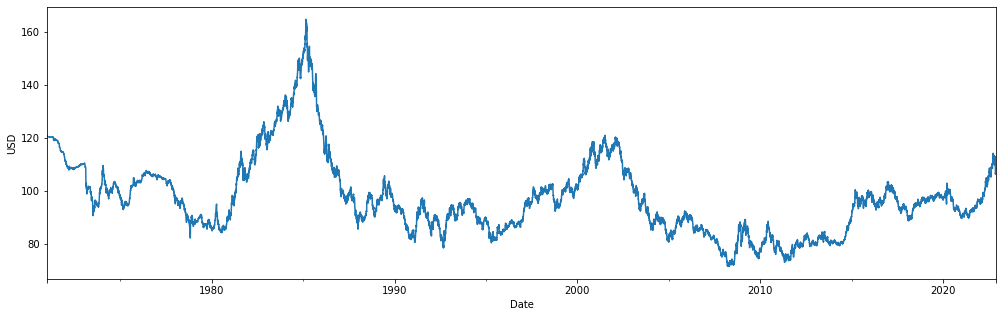

In [6]:
caption('US Dollar Prices (1971 to 2022)',
        'Time series from January 4, 1971 to November 21, 2022')

df_dxy_whole = pd.read_csv('files/dxywhole_08_to_22.csv', parse_dates=['Date'])
df_dxy_whole['Date'] = pd.to_datetime(df_dxy_whole['Date'], utc=True)
df_dxy_whole.index = df_dxy_whole.set_index('Date').index.to_period('D')
df_dxy_whole = df_dxy_whole.drop(columns=['Date'])

fig, ax = plt.subplots(figsize=(17,5))
df_dxy_whole['Close'].plot(ax=ax)
ax.set_ylabel('USD')
plt.show()

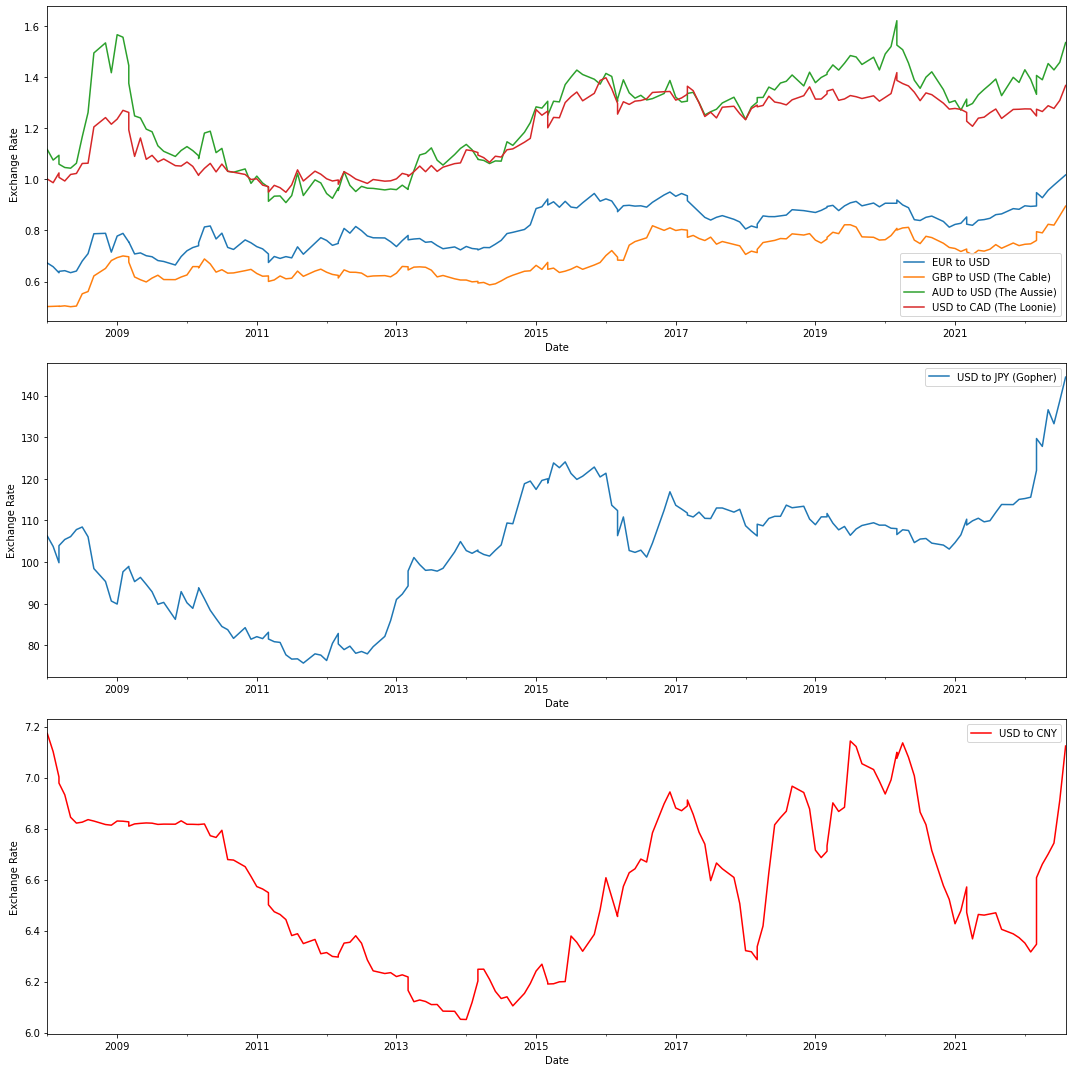

In [7]:
caption('USD Gains in 2022 Compared to select G10 Currencies Over Time',
        'Time series from January 2, 2008 to September 30, 2022')

fig, axes = plt.subplots(3,1,figsize=(15,15))
df_fx['df_eurusd']['Close'].plot(ax=axes[0])
df_fx['df_gbpusd']['Close'].plot(ax=axes[0])
df_fx['df_audusd']['Close'].plot(ax=axes[0])
df_fx['df_usdcad']['Close'].plot(ax=axes[0])
df_fx['df_usdjpy']['Close'].plot(ax=axes[1])
df_fx['df_usdcny']['Close'].plot(ax=axes[2], color='red')

axes[0].legend(['EUR to USD', 'GBP to USD (The Cable)',
                'AUD to USD (The Aussie)', 'USD to CAD (The Loonie)'])
axes[1].legend(['USD to JPY (Gopher)'])
axes[2].legend(['USD to CNY'])

for a in axes.flatten():
    a.set_ylabel('Exchange Rate')

fig.tight_layout()
plt.show()

<h2 style="color:#008B8B;font-weight:400">Interest Rates and The Fed(eral Reserve System)</h2>

In reality, numerous factors affect the movement of a country's local currency; there are as many factors affecting a country's currency as salient factors affecting a country's economy, and the counterparty's. Bounds and dynamics of a currency are also affected by the country's exchange rate regime (see types of regimes here: https://www.imf.org/external/np/mfd/er/2004/eng/0604.htm). For the United States, a <b> Floating Exchange</b> currency regime has been in use for over 50 years now. This means that the global market is allowed to determine the range of its exchange rate against the dollar. In practice, however, little is left to chance when it comes to exchange rate determination. This is where the Federal Reserve System (Fed) plays a critical role.

The Fed acts as an independent arm of the government and the United States Central Bank. Two mandates encompass its objectives: taming inflation and managing employment/unemployment. As a central bank, the Fed uses monetary policy as its tool of intervention, as well as open market operations. By setting policy rates, they are able to guide market rates and consequently, foreign exchange markets.

Fundamentally, the relationship is simple: as policy rates are raised, the attractiveness of the dollar given higher yield also increase. The effect is opposite when loosening the policy. With inflation running hot due to prolonged stimulus, the Fed has recently raised rates by a total of five times. We analyze this interaction below.

In [8]:
table_list = pd.read_html('https://www.forbes.com/advisor/investing/'
                          'fed-funds-rate-history/')

df_hike = table_list[1]
df_cut = table_list[2]
df_hike['FOMC Meeting Date'] = pd.to_datetime(df_hike['FOMC Meeting Date'])
df_cut['FOMC Meeting Date'] = pd.to_datetime(df_cut['FOMC Meeting Date'])

caption('Fed Rate Hikes', 'Taming inflation in 2022', fig=False)
display(HTML(f'<center>{df_hike.to_html(index=False)}</center>'))
caption('Fed Rate Cuts', 'Coping with COVID-19', fig=False)
display(HTML(f'<center>{df_cut.to_html(index=False)}</center>'))

FOMC Meeting Date,Rate Change (bps),Federal Funds Rate
2022-11-02,75,3.75% to 4.00%
2022-09-21,75,3.00% to 3.25%
2022-07-27,75,2.25% to 2.5%
2022-06-16,75,1.5% to 1.75%
2022-05-05,50,0.75% to 1.00%
2022-03-17,25,0.25% to 0.50%


FOMC Meeting Date,Rate Change (bps),Federal Funds Rate
2020-03-16,-100,0% to 0.25%
2020-03-03,-50,1.0% to 1.25%


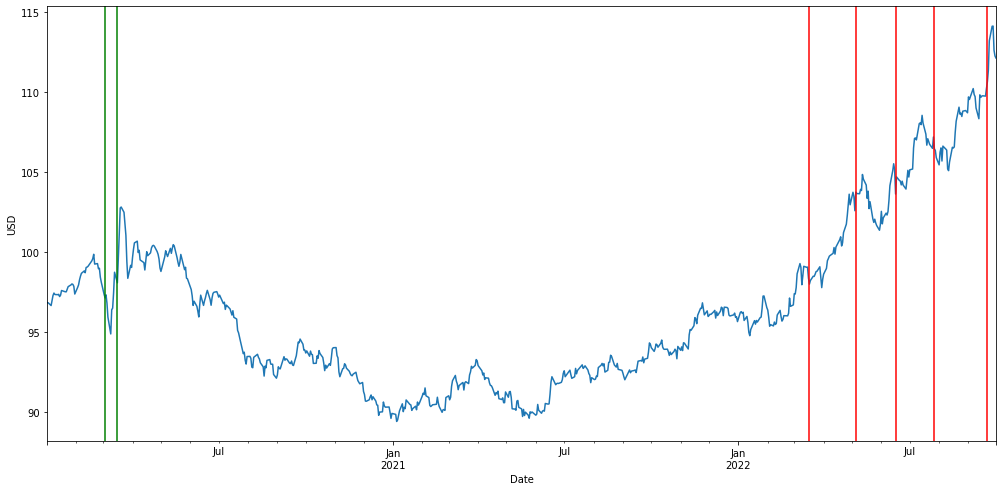

In [9]:
caption('USD Prices with Fed Rate Changes (2020-2022)', 'Green lines represent fed rate cuts during\
 in 2020. Red lines represent fed rate hikes in 2022.')
fig, ax = plt.subplots(figsize=(17,8))
df_dxy_d.loc['2020-01':'2022-10']['Close'].plot(ax=ax)
for dates in df_hike['FOMC Meeting Date'][1:]:
    plt.axvline(x=dates, color='red')
for dates in df_cut['FOMC Meeting Date']:
    plt.axvline(x=dates, color='green')
ax.set_ylabel('USD')
plt.show()

By impulse, markets have responded to the raised rates by propping up the dollar. Investments in foreign assets are generally computed as:

\begin{align}
(1+r_A)(1+r_(fx))
\end{align}

where $r_A$ is the total yield/loss on the foreign asset and $r(fx)$ is the yield/loss due to translation in exchange rates. So FX plays a large role in capital markets, especially money market where excess funds <b>need</b> to be parked.

The change in FX rate may actually be broken down into two components: <b>Base Gains</b> and <b>Domestic Interest Rates</b>

<h2 style="color:#008B8B;font-weight:400">Base Gains</h2>

We define base gains as capital gains or losses on the base currency barring effects of interest rate differentials.

There are only two reasons a currency is bought or sold: First is the need to transact with it as a counter currency. Import or exports require the exchange of currencies. Second is the speculative factor, which plays a big role in volatility.

Speculation doesn't necessarily mean taking positions for profit. For money market managers, speculation may refer to hedging of foreign assets. For central banks, open market intervention to defend the local currency may be housed under this category. Especially in times of crisis, funds flock to currencies referred to as <b>safe haven currencies </b>; the USD is one of these currencies.

Based on the long term graph, we notice that levels today are nearing early 2000s level prices. Is it as simple then as 'riding' this wave of capital appreciation for all fund managers? it turns out that it may not be as simple. Modern Portfolio Theory works with expected return and we examine this below.

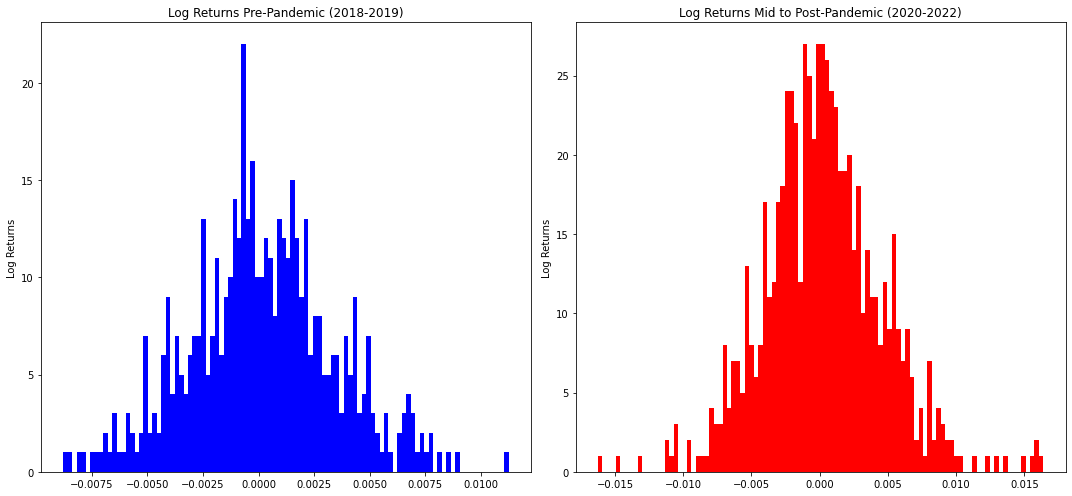

In [10]:
caption('Log Returns of Daily USD Prices',
        'Pre-Pandemic is defined as Feb. 3, 2018 to Dec. 31, 2019. \
        Mid to Post-Pandemic is defined as Jan. 1, 2020 to Oct 1, 2022')

df_dxy_d['log_ret'] = np.log1p(df_dxy_d['Close'].pct_change())
prepand_df = df_dxy_d['2018-02-03':'2019-12-31']['log_ret']
pand_df = df_dxy_d['2020-01-01':'2022-10-01']['log_ret']

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].hist(df_dxy_d['2018-02-03':'2019-12-31']['log_ret'], bins=100, color='b')
ax[1].hist(df_dxy_d['2020-01-01':'2022-10-01']['log_ret'], bins=100, color='r')

ax[0].set_title('Log Returns Pre-Pandemic (2018-2019)')
ax[0].set_ylabel('Log Returns')

ax[1].set_title('Log Returns Mid to Post-Pandemic (2020-2022)')
ax[1].set_ylabel('Log Returns')

fig.tight_layout()
plt.show()

In [11]:
display(HTML(f'<b>Pre-Pandemic Log Returns Mean:</b> {prepand_df.mean()}<br>\
<b>Pre-Pandemic Log Returns Standard Dev:</b> {prepand_df.std()}<br>\
<b>Mid to Post-Pandemic Log Returns Mean:</b> {pand_df.mean()}<br>\
<b>Mid to Post-Pandemic Log Returns Standard Dev:</b> {pand_df.std()}'))

<h1 style="color:teal;font-weight:500">Statistical Tests for FX Movement</h1>

<h2 style="color:#008B8B;font-weight:400">Two-sample t-Test</h2>

 A common assumption is, and has been shown multiple times empirically, that log returns of prices (or price multiples) follow a normal distribution. As we can see above, log returns actually exhibit fatter tails than normal; this is also a common observation among normal distributions in actual application. So we use the student's t-distribution instead to account for excess kurtosis.
 
 Two-sample t-test on the difference in means where:
 
 
$H_0$: mean of log returns are not significantly different between the time periods <br>
$H_a$: mean in our observation period is greater
 
\begin{align*}
    H_0 &: \mu_{\text{test period}} = \mu_{\text{before}}\\ 
    H_a &: \mu_{\text{test period}} > \mu_{\text{before}}
\end{align*}

In [12]:
from scipy.stats import ttest_ind
two_sample_res = ttest_ind(pand_df, prepand_df)

display(HTML(f'<b>Degrees of Freedom:</b> {len(pand_df)*2 - 2}<br>\
To test for A > B, we divide the p-value by 2 to get one-tailed test.<br>\
<b>p-value:</b> {two_sample_res[1]/2}'))
display(HTML('With a two-sample t-test, <b>we fail to reject the null \
hypothesis</b> that the means are significantly different.'))

<div class="alert alert-block alert-success">
Despite 'record' values being reached for absolute prices in the recent months, from the test above, it seems that a basis point increase is not statistically significant. So one may think twice before including the USD in one's portfolio.
</div>

<h2 style="color:#008B8B;font-weight:400">Interpretation: Carry and Interest Rate Differentials</h2>

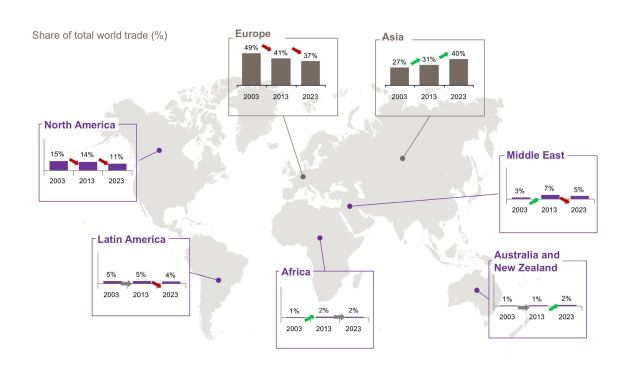

As mentioned above, interest rates play a direct role in the dynamics of foreign exchange rates. Yield for a currency plays an important role in its demand.

A Carry Trade is a straightforward strategy where one borrows currency from a low yield environment and use the proceeds to invest in a higher yielding currency. The borrowed currency is called the funding currency, while the destination currency is the yield currency. We use carry trade as our primary metric since it provides a relative values between currencies and links their rates. 

SWIFT published the top currency volumes as of 2022. We only pick top most tradeable as a yield currency since currencies that have low volume have realistically wide Bid/Ask spreads.

In [13]:
# Policy changes (if any) of the last 10 months
df_rates = pd.read_excel('files/cbpol_2211.xlsx', sheet_name='Dataframe',
                         skiprows=3, parse_dates=True)
df_rates = df_rates.set_index('Period')
df_rates_most = df_rates['2008-01-01':'2022-10-01'][-10:]
df_rates_most = df_rates_most[['United States', 'Euro area', 'China',
                               'Japan', 'United Kingdom', 'Australia',
                               'Canada', 'Philippines']]

df_rates_most2 = df_rates_most.copy()
df_rates_most2.reset_index(inplace=True)

df_rates_most2.index = df_rates_most2.index + 1
df_rates_most2 = (df_rates_most2
                  .style
                  .format({'United States': '{:,.3f}',
                           'Euro area': '{:,.2f}',
                           'China': '{:,.2f}',
                           'Japan': '{:,.2f}',
                           'United Kingdom': '{:,.2f}',
                           'Australia': '{:,.2f}',
                           'Canada': '{:,.2f}',
                           'Philippines': '{:.2f}',
                           'Period': '{:%Y-%m-%d}'})
                  .background_gradient(axis=0, 
                                       cmap='Reds', 
                                       subset=['United States', 'Philippines',
                                               'Euro area', 'China', 'Japan',
                                               'Australia', 'Canada',
                                               'United Kingdom']))

caption('Interest Rates of Top Tradeable Currency',
        'Currencies included: United States, Euro Area, China, Japan, \
        United Kingdom, Australia, Canada, Philippines', fig=False)
display(HTML(f'<center>{df_rates_most2.to_html()}</center>'))

,Period,United States,Euro area,China,Japan,United Kingdom,Australia,Canada,Philippines
1,2021-12-31,0.125,0.00,3.80,-0.10,0.25,0.10,0.25,2.00
2,2022-01-31,0.125,0.00,3.70,-0.10,0.25,0.10,0.25,2.00
3,2022-02-28,0.125,0.00,3.70,-0.10,0.50,0.10,0.25,2.00
4,2022-03-31,0.375,0.00,3.70,-0.10,0.75,0.10,0.50,2.00
5,2022-04-30,0.375,0.00,3.70,-0.10,0.75,0.10,1.00,2.00
6,2022-05-31,0.875,0.00,3.70,-0.10,1.00,0.35,1.00,2.25
7,2022-06-30,1.625,0.00,3.70,-0.10,1.25,0.85,1.50,2.50
8,2022-07-31,2.375,0.50,3.70,-0.10,1.25,1.35,2.50,3.25
9,2022-08-31,2.375,0.50,3.65,-0.10,1.75,1.85,2.50,3.75
10,2022-09-30,3.125,1.25,3.65,-0.10,2.25,2.35,3.25,4.25


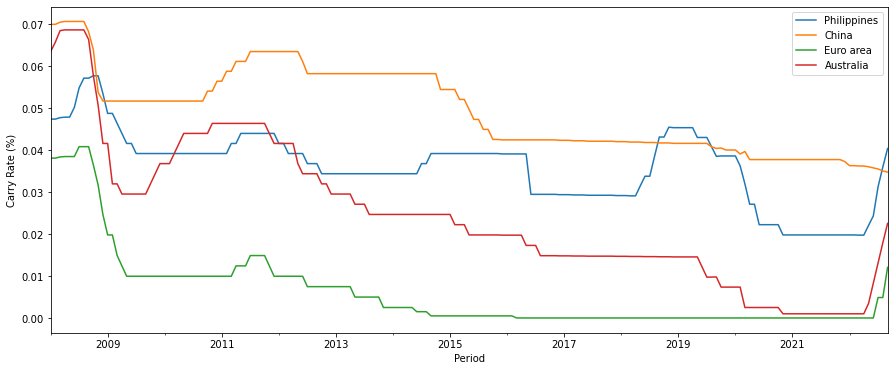

In [14]:
# Framework for carry
df_rates = pd.read_excel('files/cbpol_2211.xlsx',
                         sheet_name='Dataframe', skiprows=3, parse_dates=True)
df_rates = df_rates.set_index('Period')
df_rates_most = df_rates['2008-01-01':'2022-10-01'].ffill()
df_rates_most = df_rates_most[['United States', 'Euro area', 'China',
                               'Japan', 'United Kingdom', 'Australia',
                               'Canada', 'Philippines']]

# These values can be changed to visualize different carry trades
funding_ccy = 'United States'
yld_ccys = ['Philippines', 'China', 'Euro area', 'Australia']


country = {y_ccy: carry_gross_ret_map(
    funding_ccy, y_ccy) for y_ccy in yld_ccys}
carry_stats_df = pd.DataFrame(country)

caption('Carry Rates', '<b>Funding Currency:</b> United States<br>\
<b>Yield Currencies:</b> Philippines, China, Euro Area, Australia')
fig, ax = plt.subplots(figsize=(15, 6))
carry_stats_df.plot(ax=ax)
ax.set_ylabel('Carry Rate (%)')
plt.show()

Evident in this mapping is the tightening of spreads on the carry trade as the effect of the sharp increase in rates by the Fed. For our part, the BSP tightened in tandem with the United States, at a lagged period. This 2022 as well, signalled a milestone for EURUSD pair as it reached parity. Visually, we've seen parity of the euro against the dollar from 2016 onward. 

<h1 style="color:teal;font-weight:500">Initial Analysis for Energy Shift</h1>

<h2 style="color:#008B8B;font-weight:400">Natural Gas Imports and Exports</h2>

<div class="alert alert-block alert-success">
    Commodity view: <b>Natural Gas</b>
</div>

Earlier this year, economist Hyung Song Shin stated that the dollar's position this time around is unique in the sense that the US has shifted from an energy import to an energy exporter. In his words the dollar <i>"has moved in line with commodity exporters".<i> 

On paper, this makes sense. Two major economies have seen increased demand for energy over the past few years: Japan and the Eurozone. Aside from the Bank of Japan's many attempts to tame rates, a major problem for the country has been domestic energy production. For Europe, the war of Russia has made it difficult to obtain alternate sources of energy.

Even before the pandemic however, the US has ramped up production of oil and natural gas. While still not being a net exporter, as seen below, it is getting close to almost reaching the bottom of import cycles.

In [15]:
us_import_df = pd.read_excel('files/natgas_imports.xls', sheet_name='Data 1',
                             skiprows=2, parse_dates=True).set_index('Date')
us_export_df = pd.read_excel('files/natgas_exports.xls', sheet_name='Data 1',
                             skiprows=2, parse_dates=True).set_index('Date')
commodity_df = pd.read_excel('files/IMF_commodities.xls', skiprows=3,
                             parse_dates=True).set_index('Date')

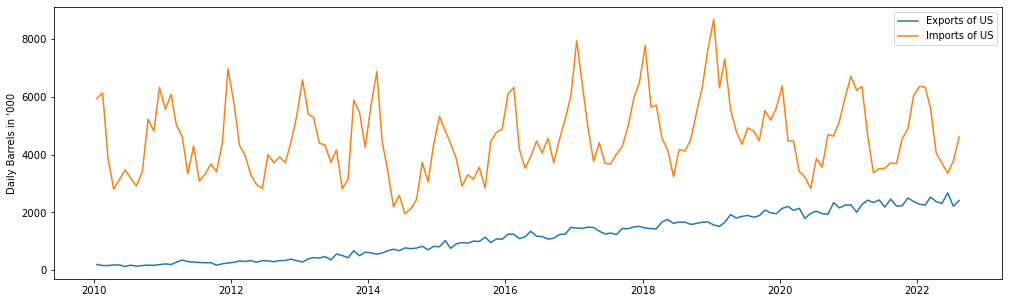

In [16]:
caption("Daily US Imports/Exports of Natural Gas Liquids (2010-2022)",
        'Data is taken from January 15, 2010 to August 15, 2022.')
fig, ax = plt.subplots(figsize=(17, 5))
ax.plot(us_export_df)
ax.plot(us_import_df)
ax.legend(['Exports of US', 'Imports of US'])
ax.set_ylabel("Daily Barrels in '000")
plt.show()

But economists have said this linear increase in export is only part of the contribution to the energy factor for the US dollar. Other commodities have followed suit with the direction of the dollar which could pose problems. Generally commodities are seen as risk assets, rising in good times. This is why one is typically used as a hedge against the other. In recent periods however, investors have been having trouble with its direction. Because of energy issues, broad commodity indices have been pulled up alongside the dollar.

We verify this dynamic below, and what we can expect moving forward. Below is a graph of the monthly closing prices of the US Dollar Index (DXY) and the IMF All Commodity Price Index. The first green bar represents the start of the pandemic and lockdowns, and the second points to the start of the Russian-Ukraine war. 

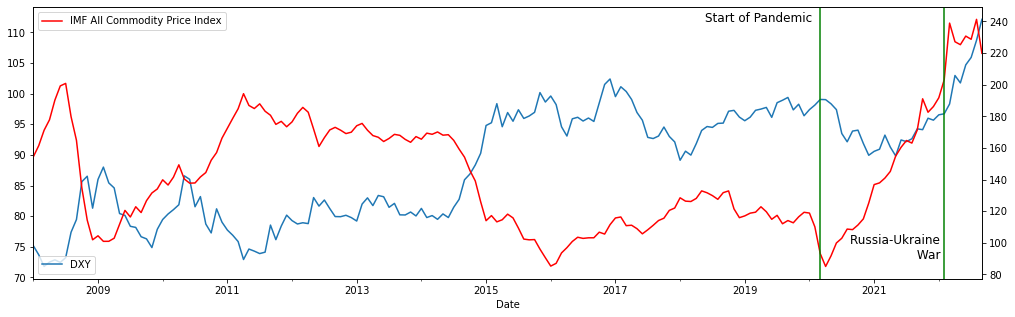

In [17]:
df_dxy = pd.read_csv('files/dxy_08_to_22_m.csv', parse_dates=['Date'])
df_dxy['Date'] = pd.to_datetime(df_dxy['Date'], utc=True)
df_dxy.index = df_dxy.set_index('Date').index.to_period('M')
df_dxy = df_dxy.drop(columns=['Date'])

fig, ax1 = plt.subplots(figsize=(17,5))
ax2 = ax1.twinx()

df_dxy['Close'].plot(x=df_dxy.index,ax=ax1)
commodity_df['2008-01-01':'2022-09-30']['All Commodity Price Index'].dropna().plot(ax=ax2, color='r')
plt.axvline(x='2020-03-16', color='green')
plt.axvline(x='2022-02-25', color='green')
ax1.legend(['DXY'], loc='lower left')
ax2.legend(['IMF All Commodity Price Index'], loc='upper left')
plt.text('Mar 3, 2020', 240, 'Start of Pandemic  ', fontsize = 12, ha='right')
plt.text('Feb 25, 2022', 90, 'Russia-Ukraine \n War ', fontsize = 12, ha='right')

caption('DXY vs IMF All Commodity Price Index Time Series (2008-2022)',
        'Green lines indicate the start of the COVID-19 Pandemic (March 16, \
        2022), and the start of the Russia-Ukraine War (February 25, 2022).')
plt.show()

<h1 style="color:teal;font-weight:500">Statistical Tests for Energy Shift</h1>

<h2 style="color:#008B8B;font-weight:400">Augmented Dickey Fuller Test (ADF)</h2>

The Augmented Dickey Fuller Test is one of the most used tests to determine stationarity. Before we proceed to test for correlation, we observe if both time series are stationary. 

Augmented Dickey Fuller Test (ADF):
 
\begin{align*}
    H_0: \text{Unit root does not exist, nonstationary}\\
    H_a: \text{Unit root exists, TS is stationary}
\end{align*}

If we confirm stationarity then we may move on to compute for the correlation and test its significance. If however, the time series is/are nonstationary, then we attempt to remove these by first order differencing then move forward.

In [18]:
from statsmodels.tsa.stattools import adfuller

# test initial normality then spearman correlation
commodity_08_20 = commodity_df['2008-01-01':
                               '2020-03-16']['All Commodity Price Index'].dropna()
dxy_08_20 = df_dxy['2008-01-01':'2020-03-16']['Close']
result_comm_0820 = adfuller(commodity_08_20)
result_dxy_0820 = adfuller(dxy_08_20)

crit_comm = "<br>".join(
    [f"{key}: {value:.3f}" for key, value in result_comm_0820[4].items()])
crit_dxy = "<br>".join(
    [f"{key}: {value:.3f}" for key, value in result_dxy_0820[4].items()])

display(HTML(f'<b>Commodity Price Index 2008-2020</b><br>\
             <b>ADF Statistic:</b> {result_comm_0820[0]:.6f}<br>\
             <b>p-value:</b> {result_comm_0820[1]:.4f}<br>\
             <b>Critical Values:</b><br>\
             {crit_comm}'))

display(HTML(f'<b>DXY 2008-2020</b><br>\
            <b>ADF Statistic:</b> {result_dxy_0820[0]:.6f}<br>\
             <b>p-value:</b> {result_dxy_0820[1]:.4f}<br>\
             <b>Critical Values:</b><br>\
             {crit_dxy}'))

The series are nonstationary, so we cant use properties of weakly stationary series. We perform first order differencing to remove the trend factor then retest. If successful, we may then calculate correlation statistics.

<h2 style="color:#008B8B;font-weight:400">Spearman's Rho Test</h2>

Sprearman's Rho is a test statistic likened to the the Pearson Correlation. However, Spearman's Rho is a nonparametric test of correlation and may be a better fit in both time series. The test is as follows:

\begin{align*}
    H_0 &: \rho_{\text{s}} = 0\\ 
    H_a &: \rho_{\text{s}} \neq 0
\end{align*}

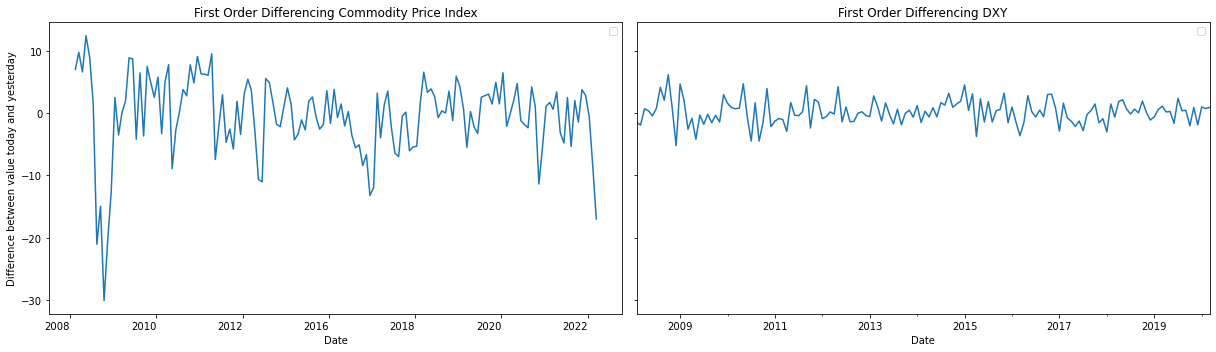

In [19]:
#First order differencing to remove nonstationarity
from scipy.stats import spearmanr

com_ = commodity_df['2008-01-01':'2020-03-16']['All Commodity Price Index'].ffill()
comm_ = com_[1:]
comm2_ = com_[:-1]
comm_diff1 = pd.DataFrame((comm_.values - comm2_.values), index=comm_.index)

dxy_ = df_dxy['2008-01-01':'2020-03-16']['Close']
usd_ = dxy_[1:]
usd2_ = dxy_[:-1]
usd_diff1 = pd.DataFrame((usd_.values - usd2_.values), index=usd_.index)

fig, ax = plt.subplots(1,2, figsize=(17,5), sharey=True)
comm_diff1.plot(ax=ax[0])
usd_diff1.plot(ax=ax[1])

caption('First Order Differencing of Commodity Price Index and DXY 2008-2020',
        'From January 1, 2008 to March 16, 2020. Removes nonstationarity from\
        the time series.')

ax[0].set_title('First Order Differencing Commodity Price Index')
labels_0 = [2006, 2008, 2010, 2012, 2016, 2018, 2020, 2022]
ax[0].set_xticklabels(labels_0, rotation=0)
ax[0].legend([])
ax[0].set_ylabel('Difference between value today and yesterday')

ax[1].set_title('First Order Differencing DXY')
ax[1].legend([])
ax[1].set_ylabel('Difference between value today and yesterday')


fig.tight_layout()
plt.show()

In [20]:
result_comm_0820_diff = adfuller(comm_diff1.values)
result_dxy_0820_diff = adfuller(usd_diff1.values)

crit_comm = "<br>".join(
    [f"{key}: {value:.3f}" for key, value in result_comm_0820_diff[4].items()])
crit_dxy = "<br>".join(
    [f"{key}: {value:.3f}" for key, value in result_dxy_0820_diff[4].items()])

display(HTML(f'<b>Commodity Price Index 2008-2020 (First Order Differenced)</b><br>\
             <b>ADF Statistic:</b> {result_comm_0820_diff[0]:.6f}<br>\
             <b>p-value:</b> {result_comm_0820_diff[1]:.4f}<br>\
             <b>Critical Values:</b><br>\
             {crit_comm}'))

display(HTML(f'<b>DXY 2008-2020 (First Order Differenced)</b><br>\
            <b>ADF Statistic:</b> {result_dxy_0820_diff[0]:.6f}<br>\
             <b>p-value:</b> {result_dxy_0820_diff[1]:.4f}<br>\
             <b>Critical Values:</b><br>\
             {crit_dxy}'))

pear_cor = np.corrcoef(usd_diff1.values.flatten(), comm_diff1.values.flatten())
spearman = spearmanr(usd_diff1.values.flatten(), comm_diff1.values.flatten())

display(HTML(f'<b>Pearson Correlation from 2008 to Mar-2020</b> between the \
dollar index and the IMF all commodity index is: {pear_cor[0][1]:.6f}<br>\
<b>Spearman Correlation:</b> {spearman[0]:.6f} and its equivalent p-value \
{spearman[1]:.6f}'))

<div class="alert alert-block alert-success">

Data since 2008 confirms the relationship between DXY and the broad commodity index. This makes sense since hedges for this have been utilized by most global banks and funds. 
    
    
</div>

<h2 style="color:#008B8B;font-weight:400">Interpretation: Dynamic changes</h2>

We have established that there is a negative cross-correlation between the two time series. The follow-up question then is: Has this dynamic changed as claimed by financial news articles?

In [21]:
#Perform the same over the latter half
commodity_20_end = commodity_df['2020-03-17':'2022-09-30']['All Commodity Price Index'].dropna()
dxy_20_end = df_dxy['2020-03-17':'2022-09-30']['Close']
result_comm_20end = adfuller(commodity_20_end)
result_dxy_20end = adfuller(dxy_20_end)

crit_comm = "<br>".join(
    [f"{key}: {value:.3f}" for key, value in result_comm_20end[4].items()])
crit_dxy = "<br>".join(
    [f"{key}: {value:.3f}" for key, value in result_dxy_20end[4].items()])

display(HTML(f'<b>Commodity Price Index 2020-2022</b><br>\
             <b>ADF Statistic:</b> {result_comm_20end[0]:.6f}<br>\
             <b>p-value:</b> {result_comm_20end[1]:.4f}<br>\
             <b>Critical Values:</b><br>\
             {crit_comm}'))

display(HTML(f'<b>DXY 2020-2022</b><br>\
            <b>ADF Statistic:</b> {result_dxy_20end[0]:.6f}<br>\
             <b>p-value:</b> {result_dxy_20end[1]:.4f}<br>\
             <b>Critical Values:</b><br>\
             {crit_dxy}'))

As we can see above, there is a need again to remove nonstationarity.

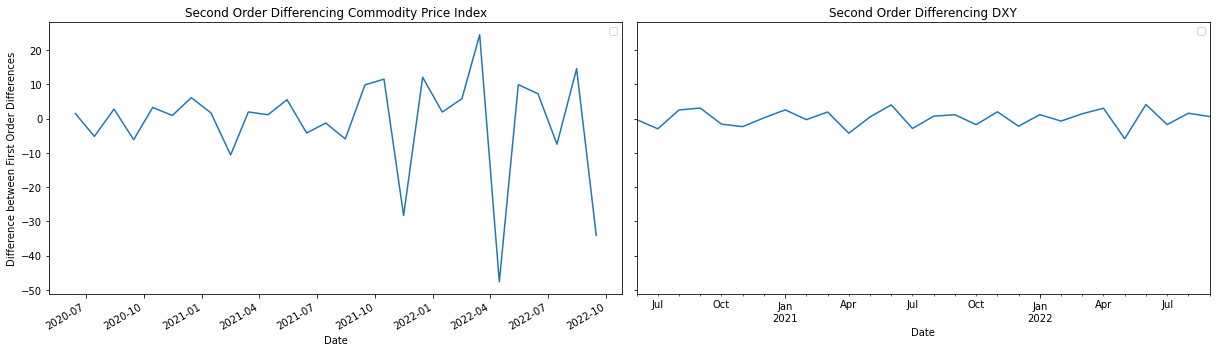

In [22]:
#First order differencing to remove nonstationarity

com_ = commodity_df['2020-04-01':'2022-09-30']['All Commodity Price Index'].ffill()
comm_ = com_[1:]
comm2_ = com_[:-1]
comm_diff1 = pd.DataFrame((comm_.values - comm2_.values), index=comm_.index)

dxy_ = df_dxy['2020-04-01':'2022-09-30']['Close']
usd_ = dxy_[1:]
usd2_ = dxy_[:-1]
usd_diff1 = pd.DataFrame((usd_.values - usd2_.values), index=usd_.index)

result_comm_20end_diff = adfuller(comm_diff1.values)
result_dxy_20end_diff = adfuller(usd_diff1.values)

display(HTML(f'<b>Commodity Price Index 2020-2022 (First Order Differenced)\
</b><br><b>p-value:</b> {result_comm_20end_diff[1]}'))
display(HTML(f'<b>DXY 2020-2022 (First Order Differenced)\
</b><br><b>p-value:</b> {result_dxy_20end_diff[1]}'))
display(HTML('From above, p-values from the ADF test are still inadequate in \
achieving stationarity, so it is necessary to use 2nd order differencing'))

#Second order differencing
comm_ = comm_diff1[1:]
comm2_ = comm_diff1[:-1]
comm_diff2 = pd.DataFrame((comm_.values - comm2_.values), index=comm_.index)

usd_ = usd_diff1[1:]
usd2_ = usd_diff1[:-1]
usd_diff2 = pd.DataFrame((usd_.values - usd2_.values), index=usd_.index)

caption('Second Order Differencing of Commodity Price Index and DXY 2020-2022',
        'From April 1, 2020 to September 30, 2022. Removes nonstationarity \
        from the time series.')

fig, ax = plt.subplots(1,2, figsize=(17,5), sharey=True)
comm_diff2.plot(ax=ax[0])
usd_diff2.plot(ax=ax[1])

ax[0].set_title('Second Order Differencing Commodity Price Index')
ax[0].legend([])
ax[0].set_ylabel('Difference between First Order Differences')

ax[1].set_title('Second Order Differencing DXY')
ax[1].legend([])
ax[1].set_ylabel('Difference between First Order Differences')

fig.tight_layout()
plt.show()

result_comm_20end_diff2 = adfuller(comm_diff2.values)
result_dxy_20end_diff2 = adfuller(usd_diff2.values)

display(HTML(f'<b>Commodity Price Index 2020-2022 (Second Order Differenced)\
</b><br><b>p-value:</b> {result_comm_20end_diff2[1]}'))
display(HTML(f'<b>DXY 2020-2022 (Second Order Differenced)\
</b><br><b>p-value:</b> {result_dxy_20end_diff2[1]}'))

pear_cor = np.corrcoef(usd_diff2.values.flatten(), comm_diff2.values.flatten())
spearman = spearmanr(usd_diff2.values.flatten(), comm_diff2.values.flatten())

display(HTML(f'<b>Pearson Correlation from Apr-2020 to Sep-2022</b> between the \
dollar index and the IMF all commodity index is: {pear_cor[0][1]:.6f}<br>\
<b>Spearman Correlation:</b> {spearman[0]:.6f} and its equivalent p-value \
{spearman[1]:.6f}'))

The results from testing however show surprising results: removing the time factor (potential for spurious correlation) through differencing, we fail to reject the null hypothesis that that Spearmans Rho is signficantly different from zero.

What exactly does this mean? It is a *fact* now that the United States has ramped up production since the pandemic started, and is further fueled by the energy crisis in Western and Central Europe, a product of the Russia-Ukraine war. Invoices from the import of natural gas has bolstered dollar strength so far. But this other trend is what bothers global economists; they worry about the longevity of this new dynamic: dollar rise going hand-in-hand with commodity prices. 

However, as we've seen in this test, there does not seem to be a proper correlation between USD and the index of commodities. Should hedges now be reinstated? Not so fast. At least for the period observed, there does not seem to be a monotonic relationship between the two. But the fact remains that recently prices and commodities *have* been moving in the same direction. Barring any underlying relationship, the case is that both assets *are* rising at this same period.

Readers should note the limitations of our assumptions. The data comprises of equivalent closing prices, once per month. Tests on more frequent data may change the results.

<h1 style="color:teal;font-weight:500">Conclusion: Trickling to Emerging Markets</h1>

<h2 style="color:#008B8B;font-weight:400">The Dollar: Our Currency, Your Problem</h2>

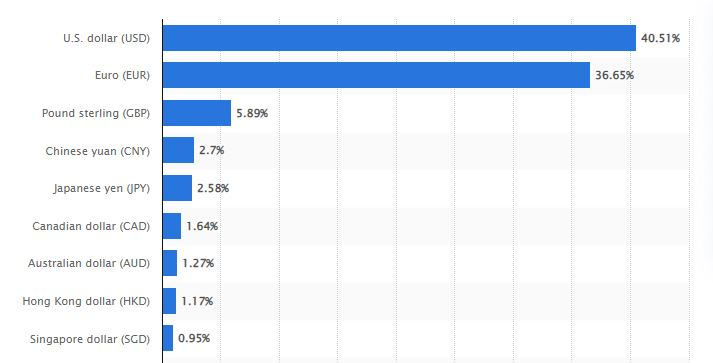

<div class="alert alert-block alert-success">

<em>“The dollar is our currency, but it is your problem.” - Treasury Secretary John Conally, 1971</em>
    
</div>

These words were spoken by then Treasury Secretary John Connally in a similar situation decades ago. However, we see ourselves in the same scenario today. The question that begs to be asked is... <b>should Filipinos care?</b>

The answer is a resounding <b>Yes</b>, by a wide margin. As it turns out, the USD counts for a lot in the Philippine economy and directly affects the economic welfare of her citizens. The image above was taken from Society for Worldwide Interbank Financial Telecommunications (SWIFT) mapping the density of the currencies to worldwide trade volume. As could be noticed, the USD and EUR still dominate a vast majority of the transactions. China, as a challenger to the world order, only registers 2.7%. The difference is still significant and the dollar is *still* our problem.

<h2 style="color:#008B8B;font-weight:400">Dollar Embeddedness</h2>

Conclusions from the statistical tests above seem to contradict the worries of economists. Should Filipinos not worry about their assets since the difference in log returns are minimal anyway? Or that there statistically has been no change in dynamics for the dollar and risk assets such as commodities? 

The answer is that the models should be taken in context with what is experienced on-ground. A structural relationship wasn't established between the dollar and commodities prices, but fact of the matter is, both *are* increasing at the same time as of late, and that affects livelihood. The dollar is embedded in our financial system in several ways:

* **Capital Markets.** Due to its volume, the dollar is the most liquid and available source of funds. It also the usual funding currency. Insurance or Pension Funds which depend on both long term and short term assets have to invest in dollars since there aren't enough assets in the domestic currency. Therefore swings affect local markets as well.<br>
<br>
* **Inflation.** Inflation is the hot topic today. Commodities purchased are in dollars, as the primary invoice currency. Funds used for purchases are borrowed in USD from banks, who also source from global markets. A depreciation then of the local currency affects local prices on all levels. <br>
<br>
* **Trade Balance.** Fiscal policy is affected by the swings in rates. As a country that mostly operates in a deficit, a strengthening of the dollar directly translates to a widening of this gap. Leverage on transactions becomes increasingly costly, and that trickles down to all consumers


<h2 style="color:#008B8B;font-weight:400">Limited Arsenal of Monetary Policy</h2>

As central bank, the Bangko Sentral ng Pilipinas has the responsibility as well to manage the exchange rate for the benefit of the country. However, on large volumes, the tools it has to navigate the local market is limited. Hard interventions on the exchange is constrained by its total dollar reserves. While rate-setting is still heavily dependent on its US counterpart, taking a more passive approach.

<h1 style="color:teal;font-weight:500">References</h1>

**FX Data**
* Yahoo!Finance. (n.d.). Retrieved from https://finance.yahoo.com/ using [yfinance API](https://pypi.org/project/yfinance/)

**Fed Rates**
* Tepper, T. (2022). Federal funds rate history 1990 to 2022. Retrieved from https://www.forbes.com/advisor/investing/fed-funds-rate-history/

**Natural Gas Import/Export Data** 
* U.S. import from U.S. of natural gas liquids. (n.d.). US Energy Information Administration. https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=M_EPL2_IM0_NUS-Z00_MBBL&f=M
* U.S. exports to U.S. of natural gas liquids. (n.d.). US Energy Information Administration. https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=pet&s=m_epl2_eex_nus-z00_mbbld&f=m

**Commodity Index**
* International Monetary Fund. (2022). Primary commodity prices: Excel database. Retrieved from https://www.imf.org/en/Research/commodity-prices

**Interest Rates**
* Bank for International Settlements. (2022). Central bank policy rates. Retrieved from https://www.bis.org/statistics/cbpol.htm